<a href="https://colab.research.google.com/github/Ruthiga-895/SCT_DS_03/blob/main/Task_3_Skillcraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Head:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Accuracy: 87.40%

Classification Report:
              precision    recall  f1-score   support

    

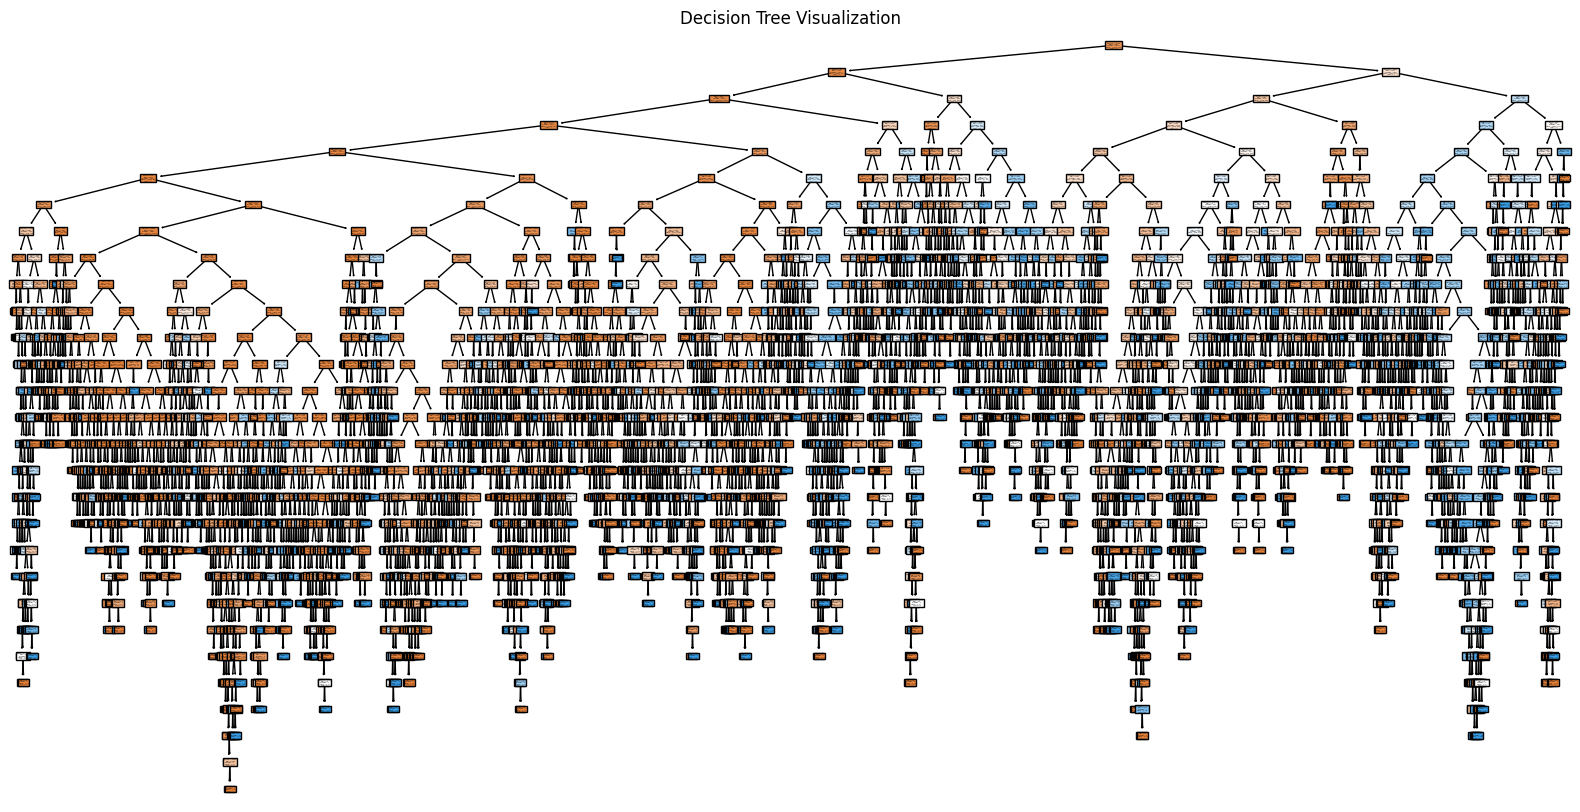


Decision Tree Rules:
|--- duration <= 510.50
|   |--- month <= 9.50
|   |   |--- age <= 60.50
|   |   |   |--- pdays <= 8.50
|   |   |   |   |--- duration <= 313.50
|   |   |   |   |   |--- month <= 0.50
|   |   |   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |   |   |--- duration <= 103.50
|   |   |   |   |   |   |   |   |--- balance <= 28.50
|   |   |   |   |   |   |   |   |   |--- campaign <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- campaign >  1.50
|   |   |   |   |   |   |   |   |   |   |--- day <= 26.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- day >  26.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- balance >  28.50
|   |   |   |   |   |   |   |   |   |--- duration <= 96.50
|   |   |   |   |   |   |   |   |   |   |--- balance <= 220.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
data = pd.read_csv('/content/bank-full.csv', sep=';')

# Display the first few rows to understand the dataset structure
print("Data Head:")
print(data.head())

# Encode categorical variables using LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Export the decision tree rules
rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(rules)


In [ ]:
# Function to take input and predict output
def predict_customer():
    print("\nEnter customer details for prediction:")
    input_data = {}
    for col in X.columns:
        value = input(f"{col}: ")
        if col in categorical_columns:
            value = label_encoders[col].transform([value])[0]
        else:
            value = float(value)
        input_data[col] = value

    input_df = pd.DataFrame([input_data])
    prediction = clf.predict(input_df)[0]
    predicted_label = label_encoders['y'].inverse_transform([prediction])[0]
    print(f"\nPredicted Output: {predicted_label}")

# Example of usage
if __name__ == "__main__":
    predict_customer()


Enter customer details for prediction:
age: 25
job: management
marital: single
education: tertiary
default: no
balance: 3000
housing: yes
loan: yes
contact: unknown
day: 5
month: may
duration: 261
campaign: 1
pdays: -1
previous: 0
poutcome: unknown

Predicted Output: no
